In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IPL Betting Models: Correlation and Data Visualization

The data has been taken from Kaggle (https://www.kaggle.com/datasets/vora1011/ipl-2008-to-2021-all-match-dataset) and looks at IPL (Indian Premier League) T20 matches. 

## Data Processing

In [2]:
# import the ball by ball csv file from Kaggle. This is ball by ball data of what happened in every match since 2008 until 2022.

ball_by_ball_df = pd.read_csv('../raw_data/IPL_Ball_by_Ball_2008_2022.csv')

In [3]:
# ball by ball is not particularly useful. We want to calculate the innings total. For this we must group by id and calculate the total runs for each innings. 

ball_by_ball_df['innings_total'] = ball_by_ball_df.groupby(['ID', 'innings'])['total_run'].transform('sum')

In [4]:
# Next we need to load up the match data. This will give us match level data for all IPL matches between 2008 and 2022

match_df = pd.read_csv('../raw_data/IPL_Matches_2008_2022.csv')
match_df.shape

(950, 20)

In [5]:
# Merge this DFs on ID to create a dataframe that will not only include the ball by ball data, but also information about who won the match, how it was won etc. 

complete_df = ball_by_ball_df.merge(match_df, on='ID')

In [6]:
# Look at shapes to sense check

print(f'match_df shape: {match_df.shape}')
print(f'ball_df shape: {ball_by_ball_df.shape}')
print(f'complete_df shape: {complete_df.shape}')

match_df shape: (950, 20)
ball_df shape: (225954, 18)
complete_df shape: (225954, 37)


In [8]:
complete_df.to_csv('../raw_data/complete_df.csv', index=False)

### Create some new features that might be useful when predicting match wins
- batsman average
- team innings average
- bowlers average (number_runs/number_wks)

Create the batsman's average. This can be done by adding up the number of runs they score in each innings and dividing it by the total number of innings. 

In [9]:
complete_df['batsman_average'] = complete_df.groupby('batter')['batsman_run'].transform('sum') / complete_df.groupby('batter')['ID'].transform('nunique')

In [10]:
complete_df['team_batting_average'] = complete_df.groupby('BattingTeam')['total_run'].transform('sum') / complete_df.groupby('BattingTeam')['ID'].transform('nunique')

In [11]:
complete_df['bowler_average'] = complete_df.groupby('bowler')['batsman_run'].transform('sum') / complete_df.groupby('bowler')['isWicketDelivery'].transform('sum')

## Data Viz and Correlation

In [12]:
complete_df.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,...,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,batsman_average,team_batting_average,bowler_average
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,...,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,23.782609,155.397906,23.991379
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,...,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,23.782609,155.397906,23.991379
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,...,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,34.962963,155.397906,23.991379
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,...,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,23.782609,155.397906,23.991379
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,...,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,23.782609,155.397906,23.991379


In [13]:
complete_df.shape

(225954, 40)

In [14]:
complete_df.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'innings_total', 'City', 'Date',
       'Season', 'MatchNumber', 'Team1', 'Team2', 'Venue', 'TossWinner',
       'TossDecision', 'SuperOver', 'WinningTeam', 'WonBy', 'Margin', 'method',
       'Player_of_Match', 'Team1Players', 'Team2Players', 'Umpire1', 'Umpire2',
       'batsman_average', 'team_batting_average', 'bowler_average'],
      dtype='object')

In [18]:
complete_df.dtypes

ID                        int64
innings                   int64
overs                     int64
ballnumber                int64
batter                   object
bowler                   object
non-striker              object
extra_type               object
batsman_run               int64
extras_run                int64
total_run                 int64
non_boundary              int64
isWicketDelivery          int64
player_out               object
kind                     object
fielders_involved        object
BattingTeam              object
innings_total             int64
City                     object
Date                     object
Season                   object
MatchNumber              object
Team1                    object
Team2                    object
Venue                    object
TossWinner               object
TossDecision             object
SuperOver                object
WinningTeam              object
WonBy                    object
Margin                  float64
method  

In [19]:
numeric_columns = complete_df.select_dtypes(include=['int64', 'float64'])

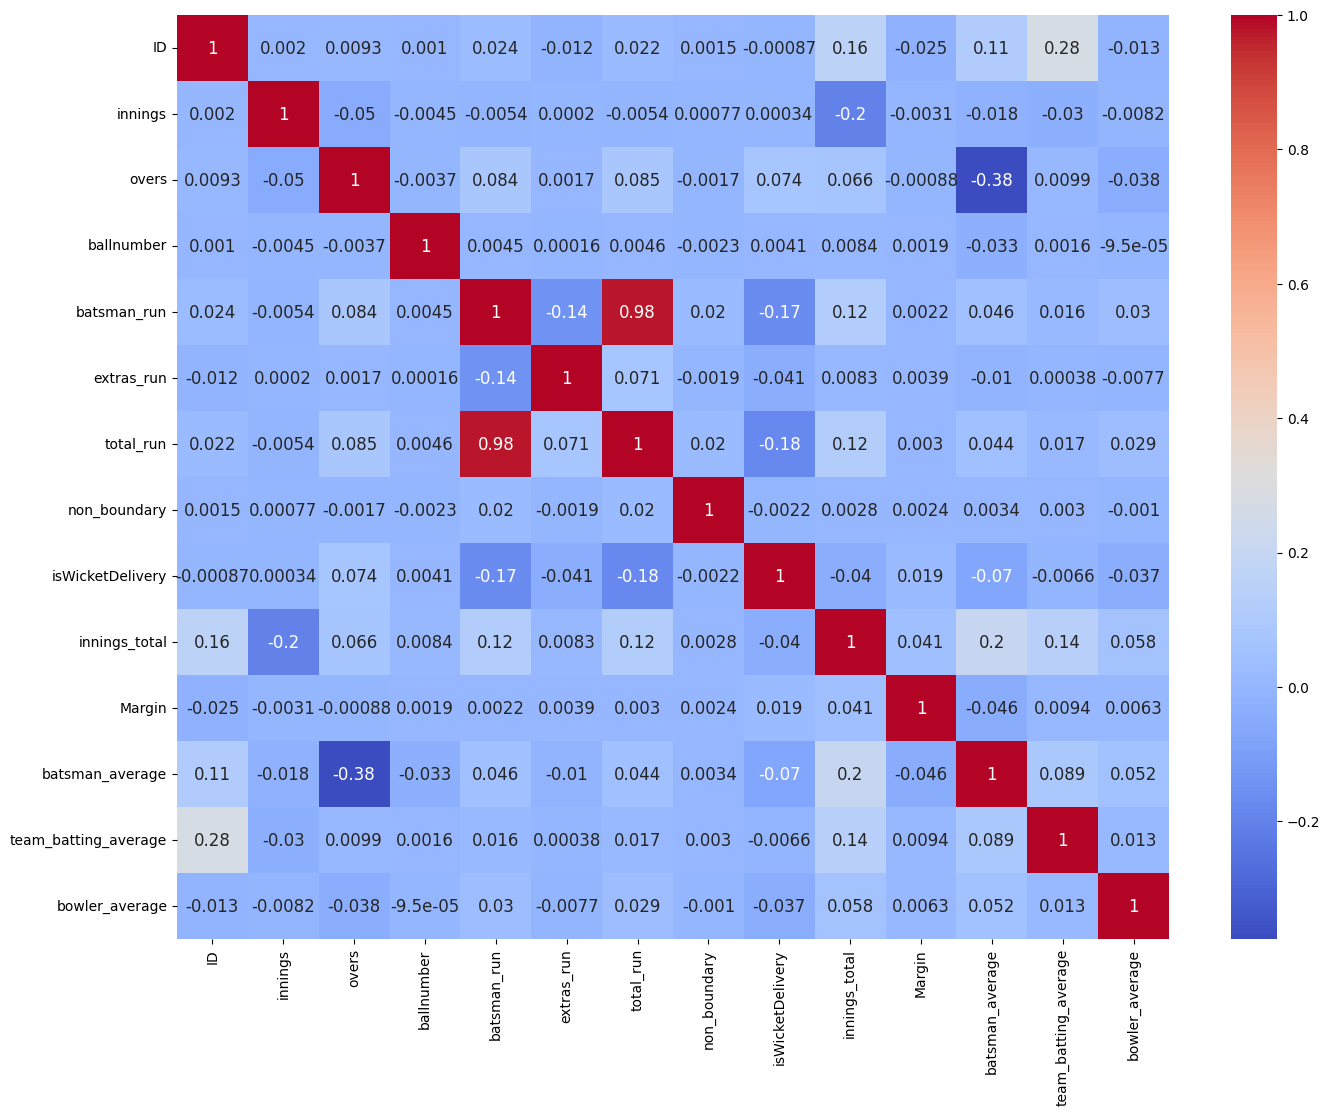

In [20]:
plt.figure(figsize=(16,12))
sns.heatmap(numeric_columns.corr(), cmap='coolwarm', annot=True, annot_kws={"size": 12});

In [21]:
numeric_columns.corr()

,ID,innings,overs,ballnumber,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,innings_total,Margin,batsman_average,team_batting_average,bowler_average
ID,1.000000,0.002039,0.009295,0.001006,0.024467,-0.012086,0.022082,0.001513,-0.000873,0.160760,-0.025493,0.111897,0.276061,-0.012802
innings,0.002039,1.000000,-0.050497,-0.004535,-0.005425,0.000203,-0.005422,0.000765,0.000340,-0.203122,-0.003136,-0.018144,-0.030279,-0.008222
overs,0.009295,-0.050497,1.000000,-0.003695,0.084464,0.001674,0.085457,-0.001689,0.073935,0.066494,-0.000885,-0.375272,0.009947,-0.037528
ballnumber,0.001006,-0.004535,-0.003695,1.000000,0.004527,0.000162,0.004596,-0.002286,0.004143,0.008423,0.001854,-0.033051,0.001596,-0.000095
batsman_run,0.024467,-0.005425,0.084464,0.004527,1.000000,-0.140860,0.977595,0.019828,-0.170370,0.117252,0.002171,0.046080,0.016335,0.029985
extras_run,-0.012086,0.000203,0.001674,0.000162,-0.140860,1.000000,0.070692,-0.001889,-0.041472,0.008330,0.003888,-0.010153,0.000384,-0.007664
total_run,0.022082,-0.005422,0.085457,0.004596,0.977595,0.070692,1.000000,0.019575,-0.180473,0.119908,0.003015,0.044269,0.016539,0.028579
non_boundary,0.001513,0.000765,-0.001689,-0.002286,0.019828,-0.001889,0.019575,1.000000,-0.002197,0.002767,0.002405,0.003389,0.002995,-0.001040
isWicketDelivery,-0.000873,0.000340,0.073935,0.004143,-0.170370,-0.041472,-0.180473,-0.002197,1.000000,-0.040252,0.019430,-0.070062,-0.006615,-0.036982
innings_total,0.160760,-0.203122,0.066494,0.008423,0.117252,0.008330,0.119908,0.002767,-0.040252,1.000000,0.040960,0.202050,0.138136,0.057612


In [22]:
round(np.abs(numeric_columns.corr()['batsman_average']).sort_values(ascending = False),2).head(6)

batsman_average         1.00
overs                   0.38
innings_total           0.20
ID                      0.11
team_batting_average    0.09
isWicketDelivery        0.07
Name: batsman_average, dtype: float64

In [23]:
round(np.abs(numeric_columns.corr()['bowler_average']).sort_values(ascending = False),2).head(6)

bowler_average      1.00
innings_total       0.06
batsman_average     0.05
overs               0.04
isWicketDelivery    0.04
batsman_run         0.03
Name: bowler_average, dtype: float64

In [24]:
round(np.abs(numeric_columns.corr()['total_run']).sort_values(ascending = False),2).head(6)

total_run           1.00
batsman_run         0.98
isWicketDelivery    0.18
innings_total       0.12
overs               0.09
extras_run          0.07
Name: total_run, dtype: float64

In [25]:
round(np.abs(numeric_columns.corr()['isWicketDelivery']).sort_values(ascending = False),2).head(6)

isWicketDelivery    1.00
total_run           0.18
batsman_run         0.17
overs               0.07
batsman_average     0.07
extras_run          0.04
Name: isWicketDelivery, dtype: float64

In [26]:
round(np.abs(numeric_columns.corr()['team_batting_average']).sort_values(ascending = False),2).head(6)

team_batting_average    1.00
ID                      0.28
innings_total           0.14
batsman_average         0.09
innings                 0.03
total_run               0.02
Name: team_batting_average, dtype: float64

In [27]:
round(np.abs(numeric_columns.corr()['bowler_average']).sort_values(ascending = False),2).head(6)

bowler_average      1.00
innings_total       0.06
batsman_average     0.05
overs               0.04
isWicketDelivery    0.04
batsman_run         0.03
Name: bowler_average, dtype: float64

In [28]:
round(np.abs(numeric_columns.corr()['Margin']).sort_values(ascending = False),2).head(6)

Margin                  1.00
batsman_average         0.05
innings_total           0.04
ID                      0.03
isWicketDelivery        0.02
team_batting_average    0.01
Name: Margin, dtype: float64

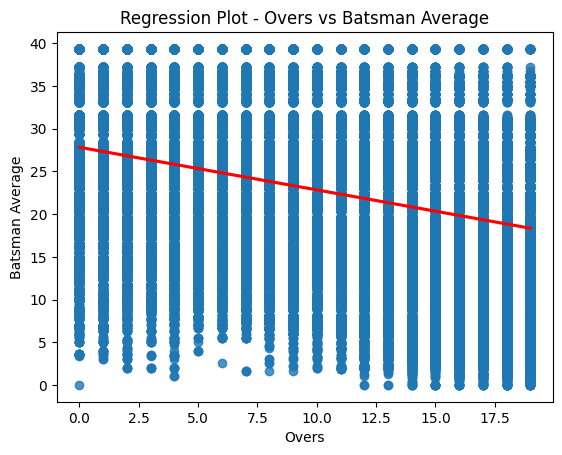

In [29]:
# regression plot
sns.regplot(x = numeric_columns.overs, y= numeric_columns.batsman_average, line_kws={"color": "red"})
plt.xlabel('Overs')
plt.ylabel('Batsman Average')
plt.title('Regression Plot - Overs vs Batsman Average'); # regression plot

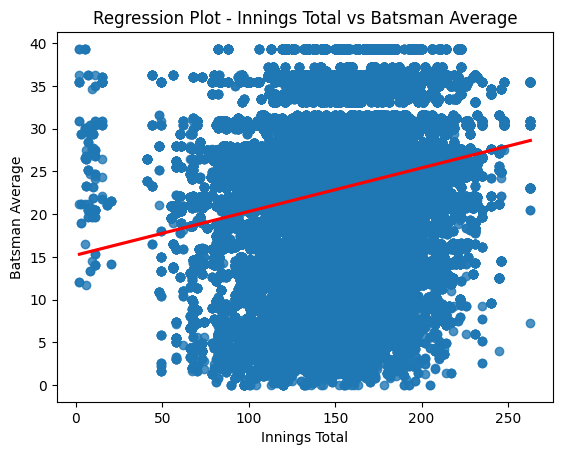

In [30]:
# regression plot
sns.regplot(x = numeric_columns.innings_total, y= numeric_columns.batsman_average, line_kws={"color": "red"})
plt.xlabel('Innings Total')
plt.ylabel('Batsman Average')
plt.title('Regression Plot - Innings Total vs Batsman Average');

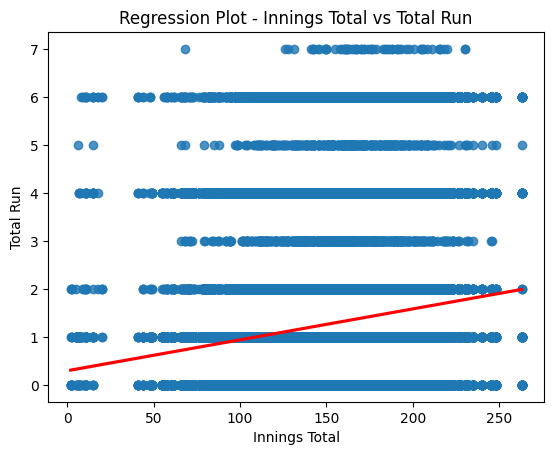

In [31]:
# regression plot
sns.regplot(x = numeric_columns.innings_total, y= numeric_columns.total_run, line_kws={"color": "red"})
plt.xlabel('Innings Total')
plt.ylabel('Total Run')
plt.title('Regression Plot - Innings Total vs Total Run');

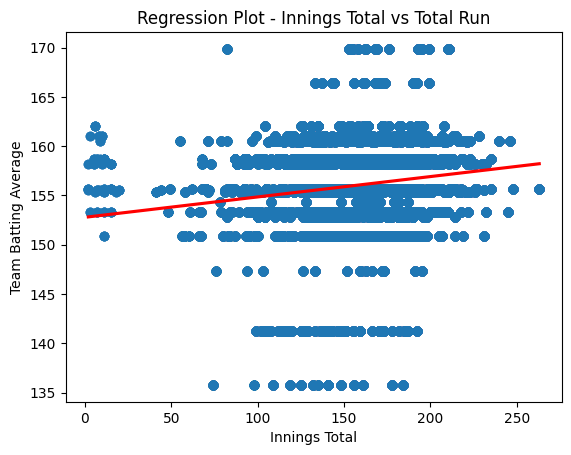

In [32]:
# regression plot
sns.regplot(x = numeric_columns.innings_total, y= numeric_columns.team_batting_average, line_kws={"color": "red"})
plt.xlabel('Innings Total')
plt.ylabel('Team Batting Average')
plt.title('Regression Plot - Innings Total vs Total Run');

/Users/mgomboski/.pyenv/versions/3.10.6/envs/ipl_prediction_model/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mgomboski/.pyenv/versions/3.10.6/envs/ipl_prediction_model/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


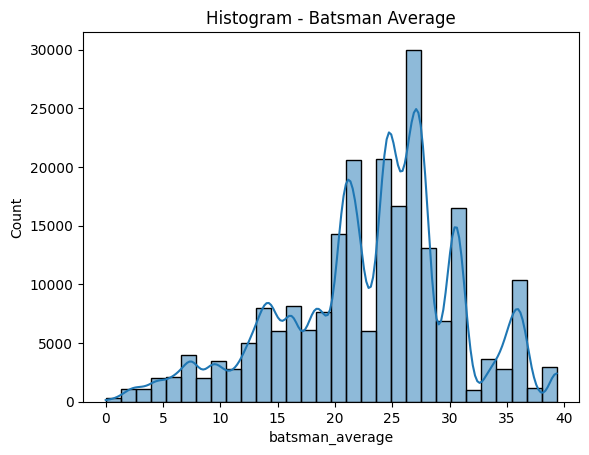

In [33]:
# histogram
sns.histplot(numeric_columns.batsman_average, kde=True, bins=30)
plt.title('Histogram - Batsman Average');

/Users/mgomboski/.pyenv/versions/3.10.6/envs/ipl_prediction_model/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mgomboski/.pyenv/versions/3.10.6/envs/ipl_prediction_model/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mgomboski/.pyenv/versions/3.10.6/envs/ipl_prediction_model/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


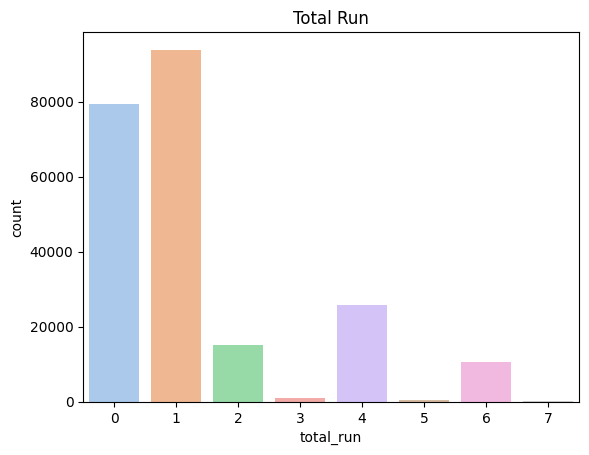

In [34]:
# countplot
sns.countplot(data = numeric_columns , x = numeric_columns.total_run, palette='pastel')
plt.title('Total Run');

/Users/mgomboski/.pyenv/versions/3.10.6/envs/ipl_prediction_model/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mgomboski/.pyenv/versions/3.10.6/envs/ipl_prediction_model/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


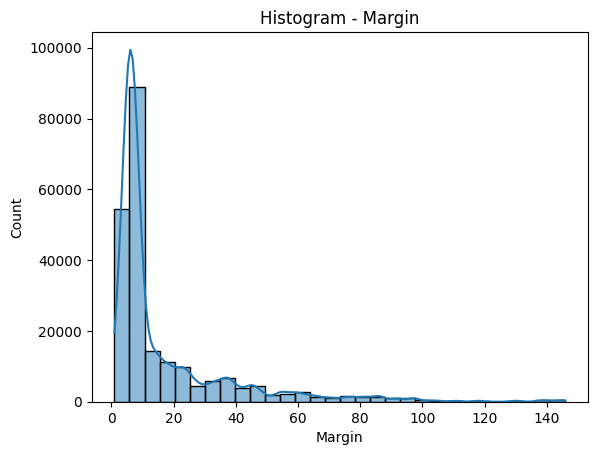

In [35]:
# histplot
sns.histplot(numeric_columns.Margin, kde=True, bins=30)
plt.title('Histogram - Margin');

/Users/mgomboski/.pyenv/versions/3.10.6/envs/ipl_prediction_model/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


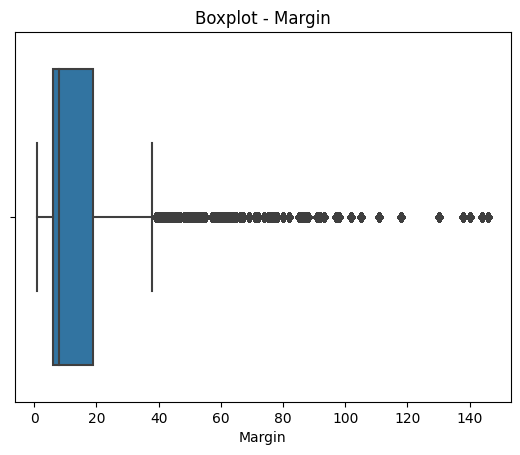

In [36]:
# boxplot
sns.boxplot(data=numeric_columns, x = numeric_columns.Margin)
plt.title("Boxplot - Margin");

In [ ]:
complete_df.columns